## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_drop_df = application_df.drop(['STATUS', 'SPECIAL_CONSIDERATIONS'], axis=1, inplace=True)
app_drop_df

In [3]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

EIN                 34299
NAME                19568
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 800].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: count, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
print(class_count[class_count > 1])

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 1000
].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,EIN,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,10520599,5000,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,10531628,108590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,10547893,5000,0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,10553066,6692,1,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,10556103,142590,1,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,5000,0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34295,996010315,5000,0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34296,996012607,5000,0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34297,996015768,5000,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [10]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

features = X_test_scaled.shape[1]
print(f"Number of features after scaling: {features}")

Number of features after scaling: 19606


## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 9

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\Thoma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │       156,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,965 (613.14 KB)

 Trainable params: 156,965 (613.14 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])


Epoch 1/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5404 - loss: 0.6925 - val_accuracy: 0.5284 - val_loss: 0.6289 - learning_rate: 0.0010
Epoch 2/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8223 - loss: 0.5373 - val_accuracy: 0.7964 - val_loss: 0.5029 - learning_rate: 0.0010
Epoch 3/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9171 - loss: 0.2931 - val_accuracy: 0.8008 - val_loss: 0.5147 - learning_rate: 0.0010
Epoch 4/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9503 - loss: 0.1779 - val_accuracy: 0.8044 - val_loss: 0.4960 - learning_rate: 0.0010
Epoch 5/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9606 - loss: 0.1353 - val_accuracy: 0.8043 - val_loss: 0.4890 - learning_rate: 0.0010
Epoch 6/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9621 - loss: 0.1157 - val_accuracy: 0.8021 - val_loss: 0.5241 - learning_rate: 0.0010
Epoch 7/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9620 - loss: 0.

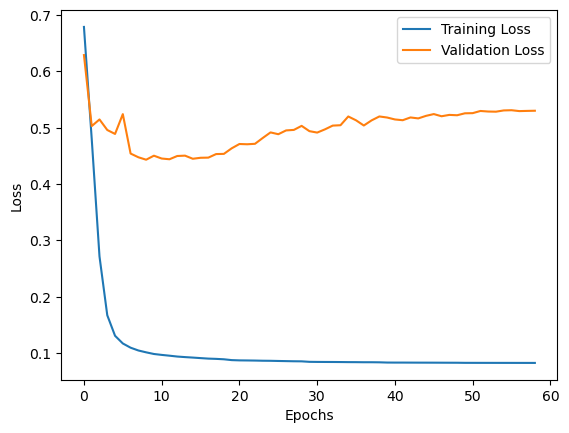

268/268 - 0s - 1ms/step - accuracy: 0.8010 - loss: 0.4433


In [ ]:


# Save the best model weights
checkpoint = ModelCheckpoint("AlphabetSoupCharity3.keras", save_best_only=True, monitor="val_loss", mode="min")

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)

# Reduce learning rate when validation loss plateaus
lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.4, patience=10, min_lr=1e-6)

# Add all callbacks
callbacks = [checkpoint, early_stopping, lr_reduce]

# Train the model
fit_model = nn.fit(
    X_train_scaled, 
    y_train, 
    validation_data=(X_test_scaled, y_test), 
    epochs=100, 
    batch_size=64, 
    callbacks=callbacks
)

# Visualize the training history
history = fit_model.history

plt.plot(history["loss"], label="Training Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)


In [15]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 0s - 1ms/step - accuracy: 0.8010 - loss: 0.4433
Loss: 0.44327041506767273, Accuracy: 0.8010495901107788


In [16]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_3.h5")